In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
files = ['AAA.csv', 'AAAU.csv', 'AADR.csv']
etf_data = {}
for file in files:
    etf_data[file.split('.')[0]] = pd.read_csv(file)

In [3]:
for ticker, df in etf_data.items():
    print(f"Descriptive Statistics for {ticker}")
    print(df.describe())
    print("\n")

Descriptive Statistics for AAA
             Open        High         Low       Close   Adj Close  \
count  251.000000  251.000000  251.000000  251.000000  251.000000   
mean    24.956100   24.990020   24.917128   24.949454   24.070701   
std      0.176131    0.181777    0.171326    0.171797    0.595803   
min     24.570000   24.570000   24.124001   24.540001   22.984818   
25%     24.820000   24.842500   24.799999   24.815001   23.566418   
50%     25.010000   25.062000   24.959999   25.004999   24.117624   
75%     25.110001   25.150000   25.059999   25.100000   24.586613   
max     25.250000   25.260000   25.205000   25.225000   24.980465   

             Volume  
count    251.000000  
mean    5568.924303  
std     6357.621445  
min        0.000000  
25%     1500.000000  
50%     3300.000000  
75%     7600.000000  
max    41200.000000  


Descriptive Statistics for AAAU
             Open        High         Low       Close   Adj Close  \
count  251.000000  251.000000  251.000000  251

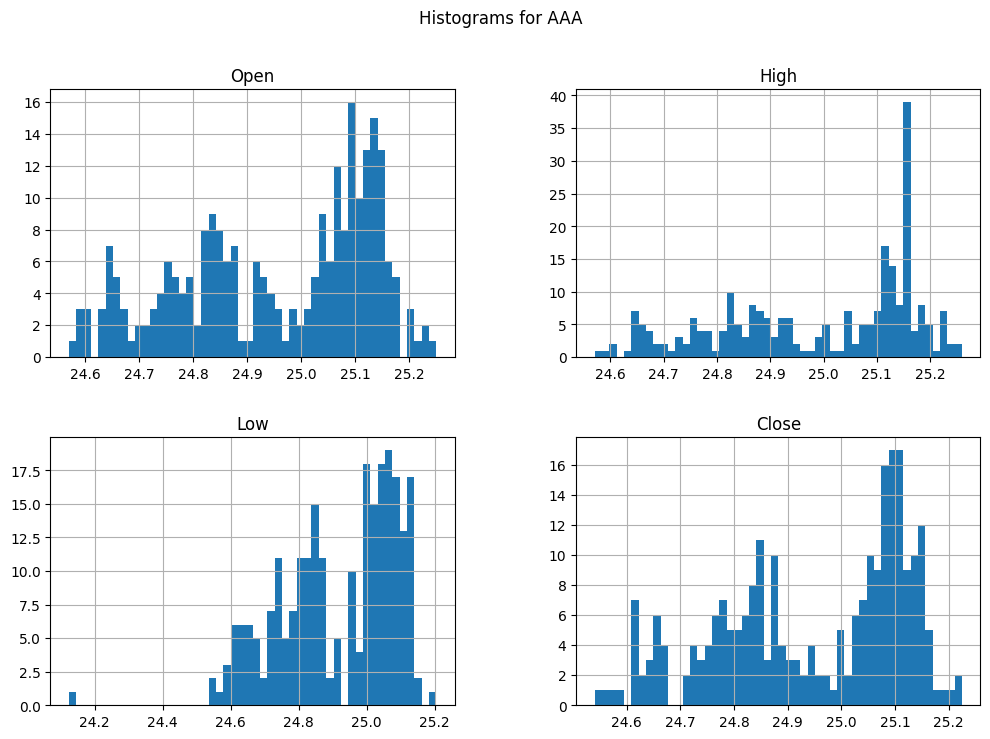

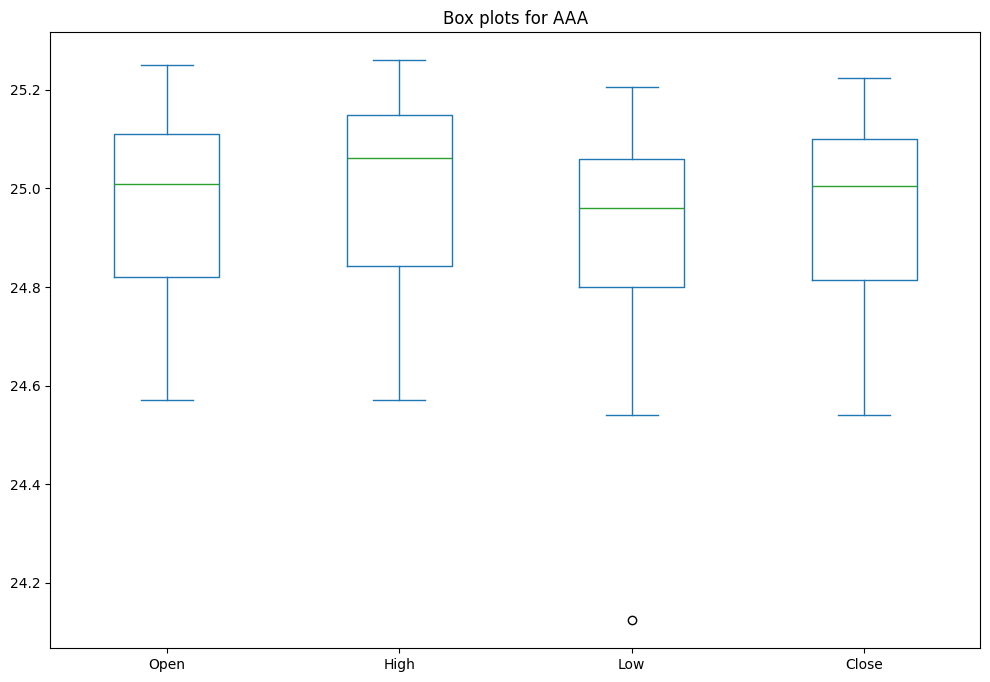

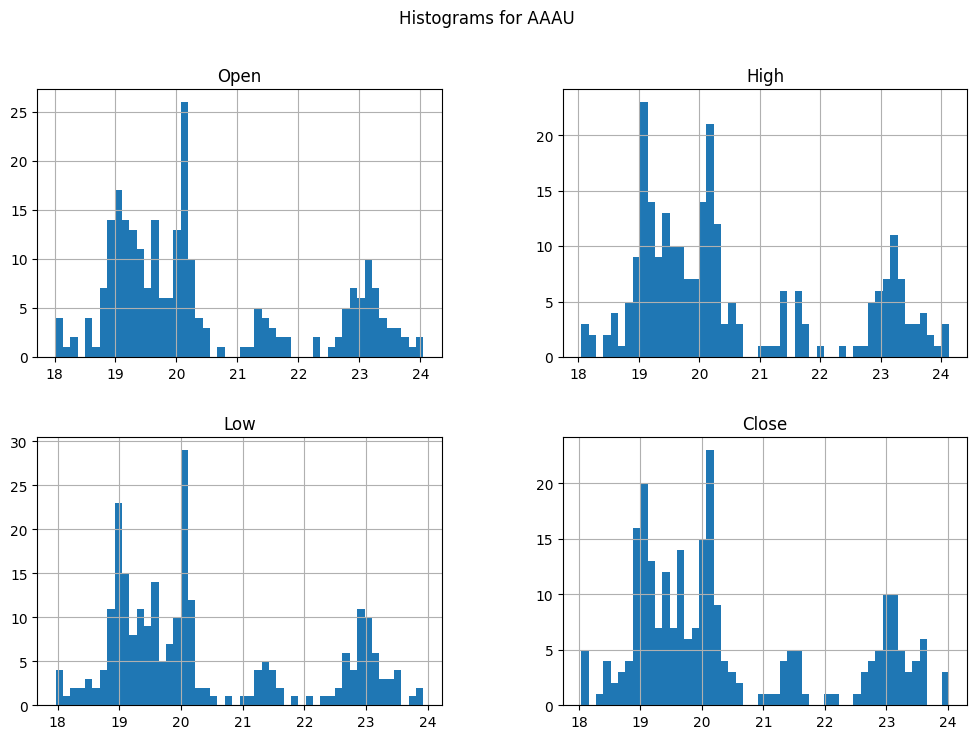

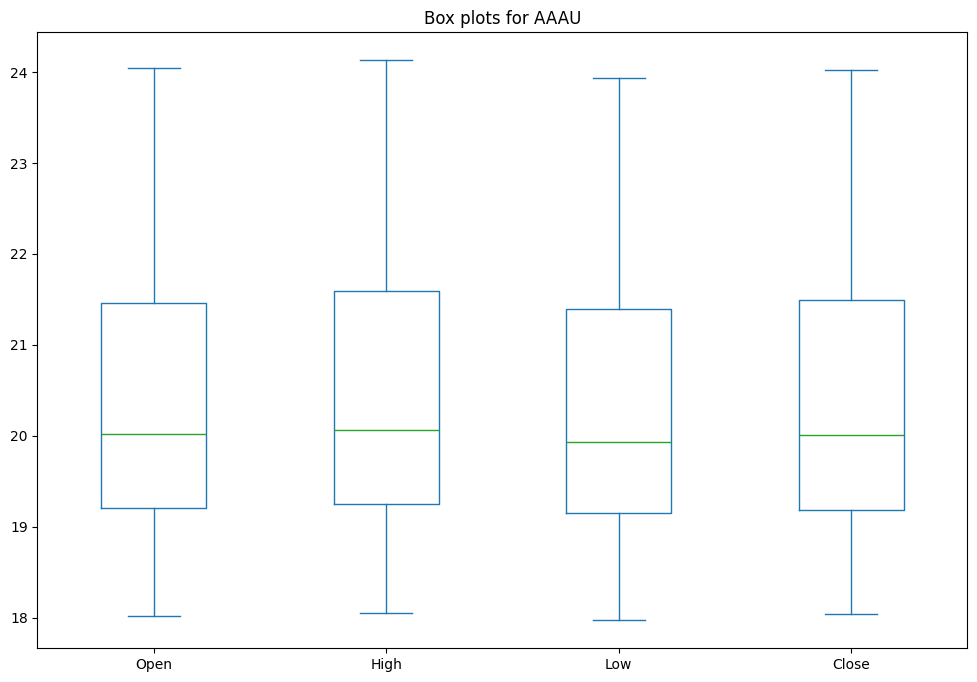

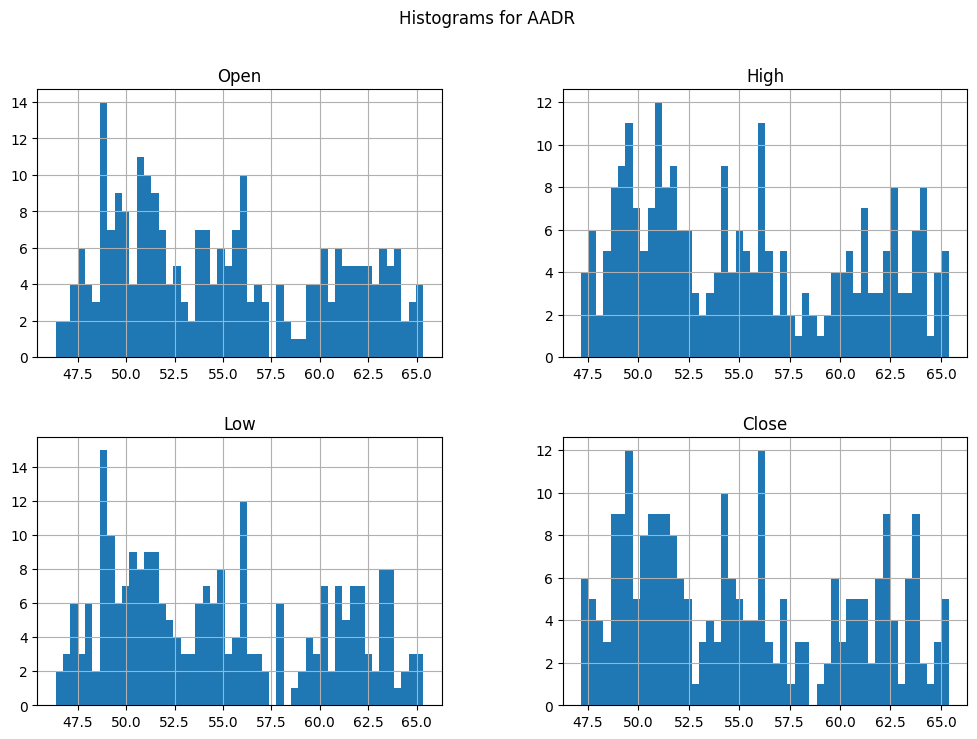

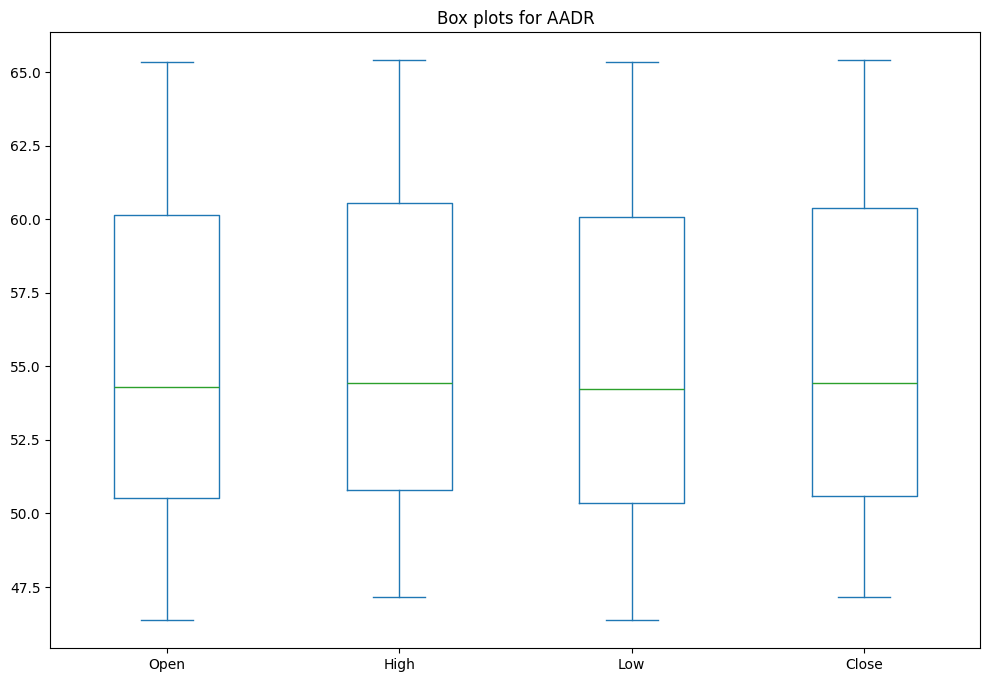

In [4]:
for ticker, df in etf_data.items():
    df[['Open', 'High', 'Low', 'Close']].hist(bins=50, figsize=(12, 8))
    plt.suptitle(f'Histograms for {ticker}')
    plt.show()

    df[['Open', 'High', 'Low', 'Close']].plot(kind='box', figsize=(12, 8))
    plt.title(f'Box plots for {ticker}')
    plt.show()

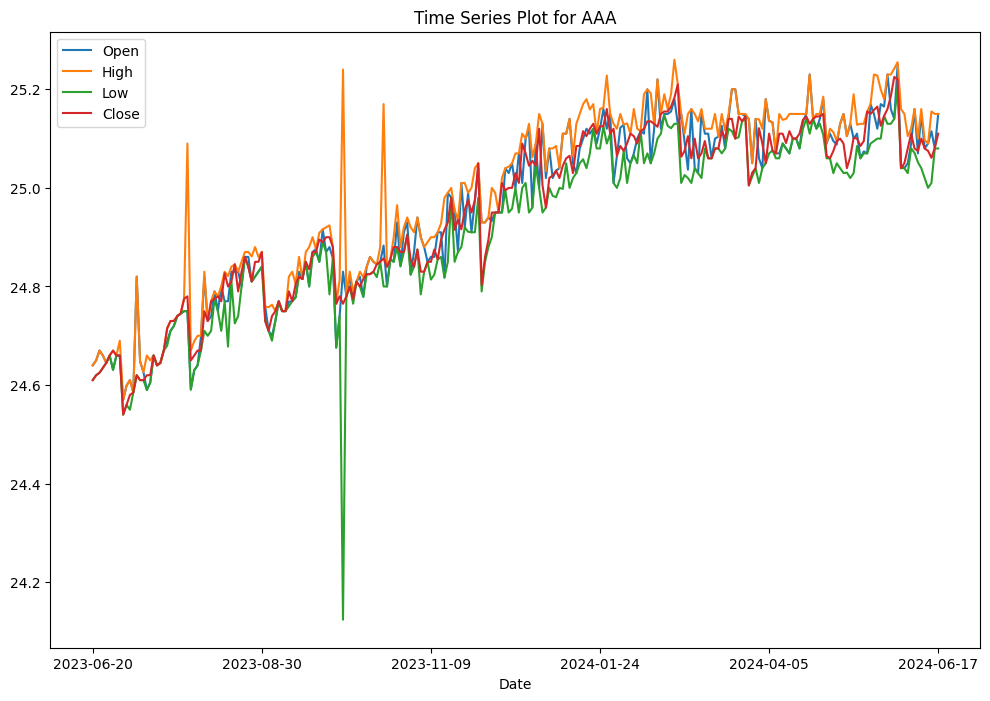

In [5]:
def plot_time_series(ticker):
    if ticker in etf_data:
        df = etf_data[ticker]
        df.set_index('Date', inplace=True)
        df[['Open', 'High', 'Low', 'Close']].plot(figsize=(12, 8))
        plt.title(f'Time Series Plot for {ticker}')
        plt.show()

plot_time_series('AAA')


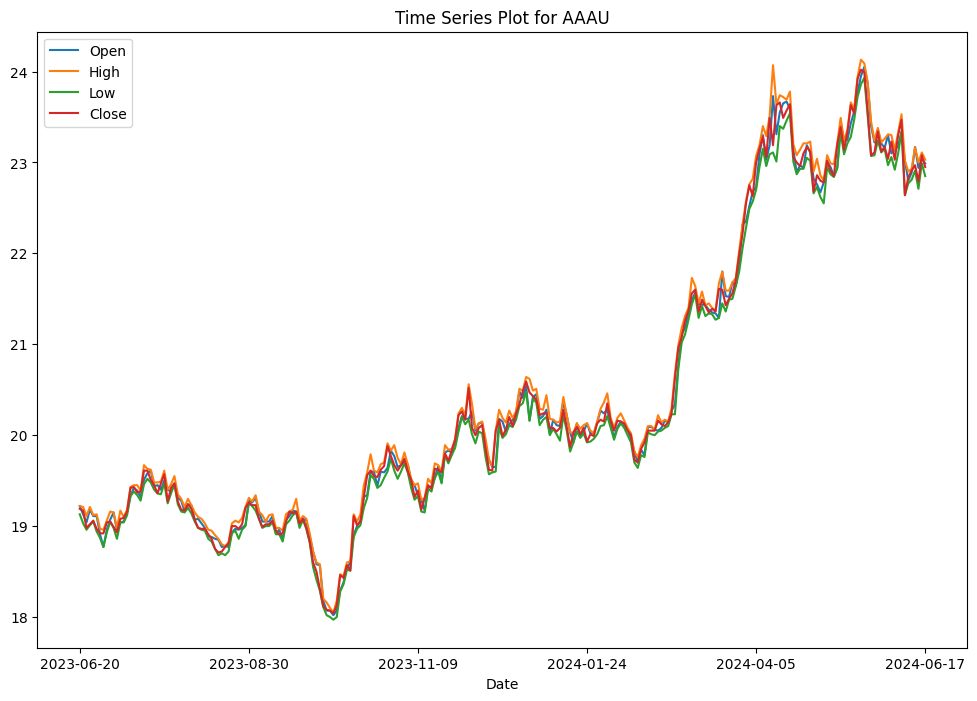

In [6]:
plot_time_series('AAAU')

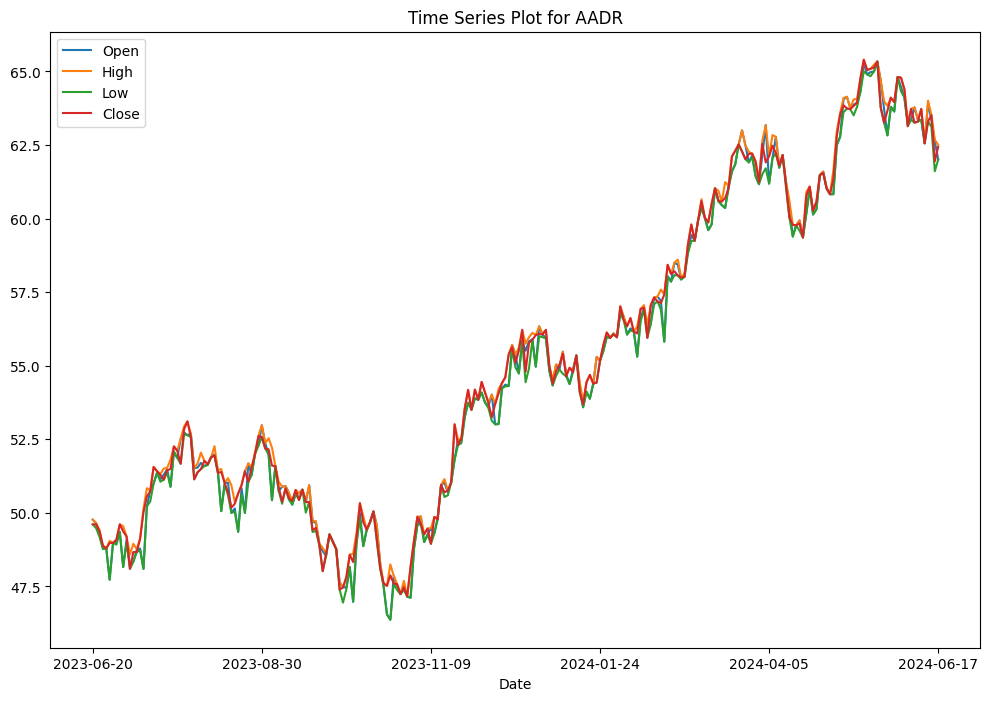

In [7]:
plot_time_series('AADR')

In [8]:
for ticker, df in etf_data.items():
    missing_data = df.isnull().sum()
    print(f"Missing Data for {ticker}")
    print(missing_data)
    print("\n")

Missing Data for AAA
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


Missing Data for AAAU
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


Missing Data for AADR
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64




In [9]:
def detect_anomalies(df, threshold=3):
    anomalies = {}
    for column in ['Open', 'High', 'Low', 'Close']:
        z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
        anomalies[column] = df[z_scores > threshold]
    return anomalies

for ticker, df in etf_data.items():
    anomalies = detect_anomalies(df)
    for column, anomaly_df in anomalies.items():
        if not anomaly_df.empty:
            print(f"Anomalies in {column} for {ticker}")
            print(anomaly_df)
            print("\n")

Anomalies in Low for AAA
             Open   High        Low      Close  Adj Close  Volume
Date                                                             
2023-10-04  24.83  25.24  24.124001  24.764999  23.627697    2000


